In [45]:
import torch
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

In [46]:
sys.path.append("..")
from dc_bit.data_loader import for_pytorch
from dc_bit.utils import get_predictions, read_label_encoding, get_model, choose_device

In [47]:
#DATASET = 'Dogs'
DATASET = 'Birds'

In [48]:
device = choose_device()

In [79]:
if DATASET == 'Dogs':
    path_to_weights = Path('/Users/aleksandrafront/Library/Mobile Documents/com~apple~CloudDocs/Music Notes Dataset/29_11_2021_00-21_musicNotes.pth')
    path_to_label_encoding = Path('/mnt/ml-team/homes/grzegorz.los/projects/dc_bit/dogs/classes.txt')
    img_paths = list(Path('/mnt/ml-team/homes/grzegorz.los/datasets/dogs/test').glob('*'))
    
    model = get_model(
        path_to_weights=path_to_weights,
        device=device,
        load_head=True,
        n_classes=10
    )
elif DATASET == 'Birds':
    path_to_weights = Path('/Users/aleksandrafront/Library/Mobile Documents/com~apple~CloudDocs/Music Notes Dataset/29_11_2021_00-21_musicNotes2.pth')
    path_to_label_encoding = Path('/Users/aleksandrafront/Library/Mobile Documents/com~apple~CloudDocs/Music Notes Dataset/classes.txt')
    img_paths = list(Path('/Users/aleksandrafront/Documents/TestingSetV2/whole').glob('*'))
    img_paths.sort()
    model = get_model(
        path_to_weights=path_to_weights,
        device=device,
        load_head=True,
        n_classes=14
    )


In [80]:
code_to_label = read_label_encoding(path_to_label_encoding)

In [81]:
if len(code_to_label) <= 10:
    for k, v in list(code_to_label.items()):
        print('{}: {}'.format(k, v))
else:
    for k, v in list(code_to_label.items())[:4]:
        print('{}: {}'.format(k, v))
    print('⋮')
    for k, v in list(code_to_label.items())[-4:]:
        print('{}: {}'.format(k, v))

0: bemol
1: dot
2: eight
3: half
⋮
10: restWhole
11: sharp
12: sixteenth
13: whole


In [82]:
def select_most_likely(preds, count=3):
    indices_sorted = np.argsort(preds)[::-1]
    return [(i, preds[i]) for i in indices_sorted[:count]]

def build_summary(preds, code_to_label, count=3, include_other=True):
    most_likely = select_most_likely(preds, count)
    
    lines = ["Predicted classes:"]
    
    for i, p in most_likely:
        lines.append("  - {}: {:.1%}".format(code_to_label[i], p))
    
    if include_other:
        s = sum([p for _, p in most_likely])
        lines.append("  - Other: {:.1%}".format(1 - s))
    
    return '\n'.join(lines)
    

def display_img_and_labels(img, preds, code_to_label, count=3, include_other=True):
    summary = build_summary(preds, code_to_label, count, include_other)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1).imshow(img_pil)
    plt.axis('off')
    plt.subplot(1, 2, 2).text(0.0, 0.50, summary, fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

whole1637713837-798345.jpg


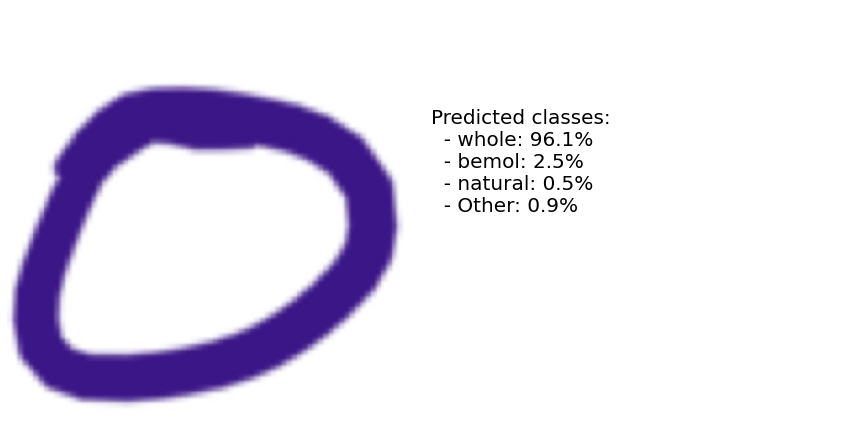

whole1637713839-221562.jpg


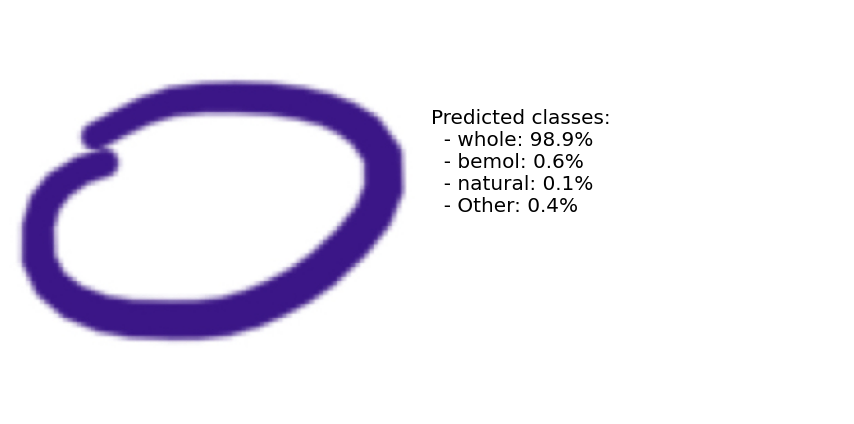

whole1637713840-722612.jpg


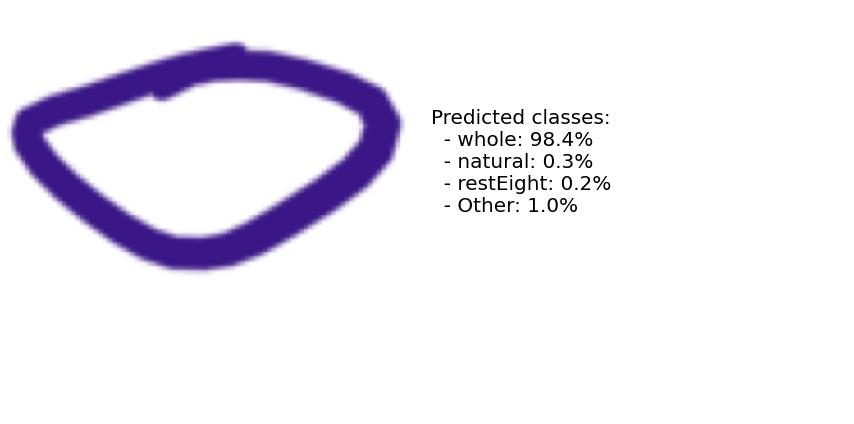

whole1637713842-095355.jpg


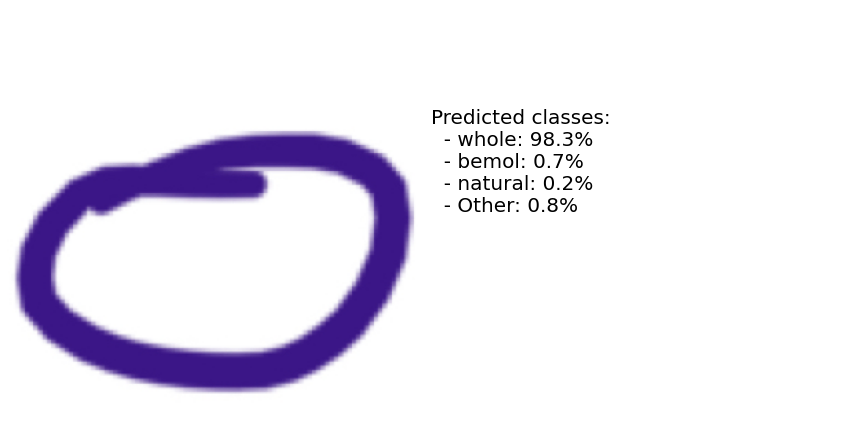

whole1637713843-334147.jpg


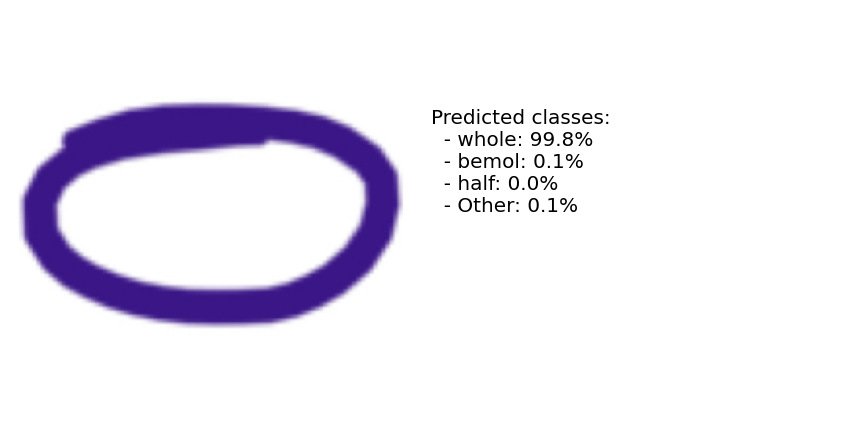

whole1637713844-6568952.jpg


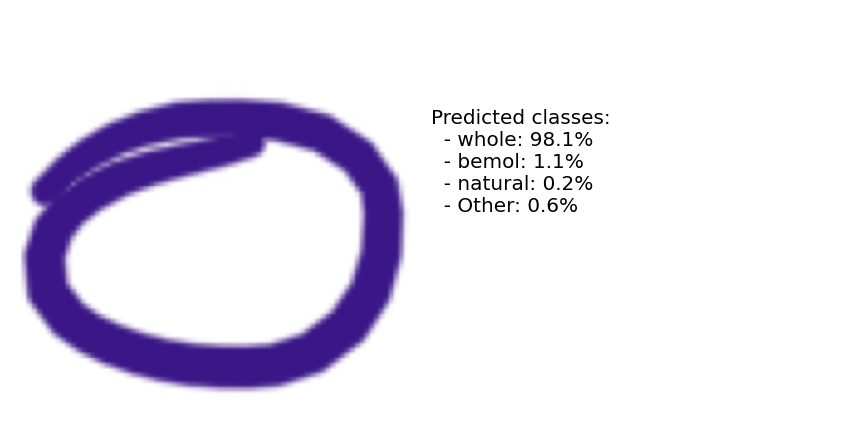

whole1637713847-0072432.jpg


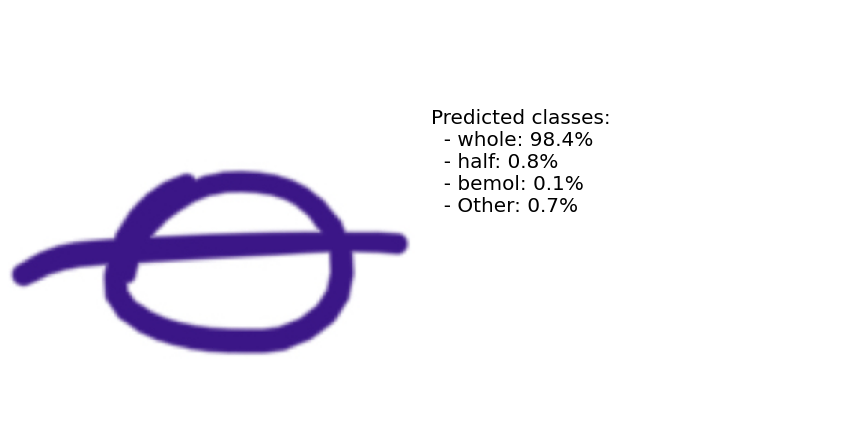

whole1637713848-445518.jpg


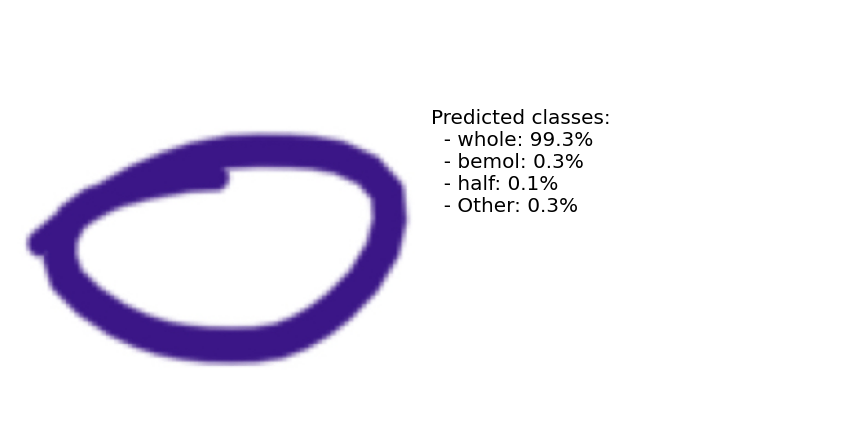

whole1637713850-031909.jpg


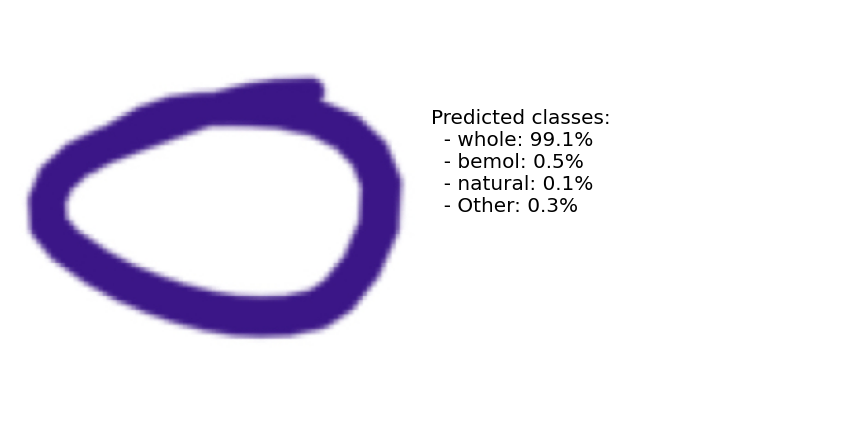

whole1637713851-729593.jpg


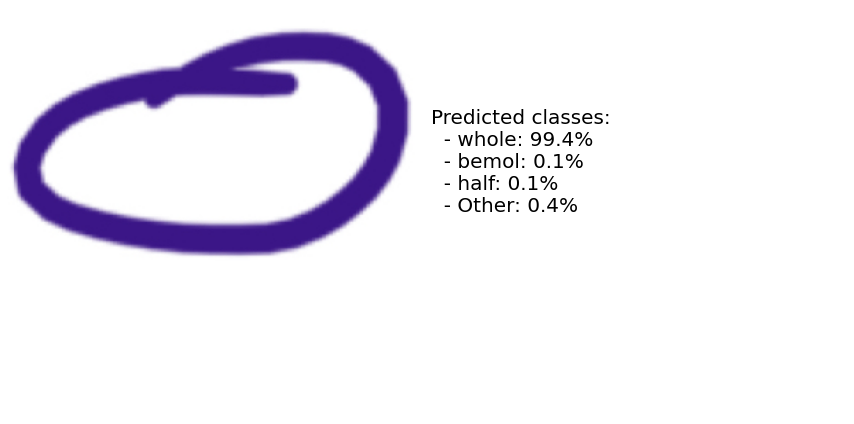

whole1637713853-754112.jpg


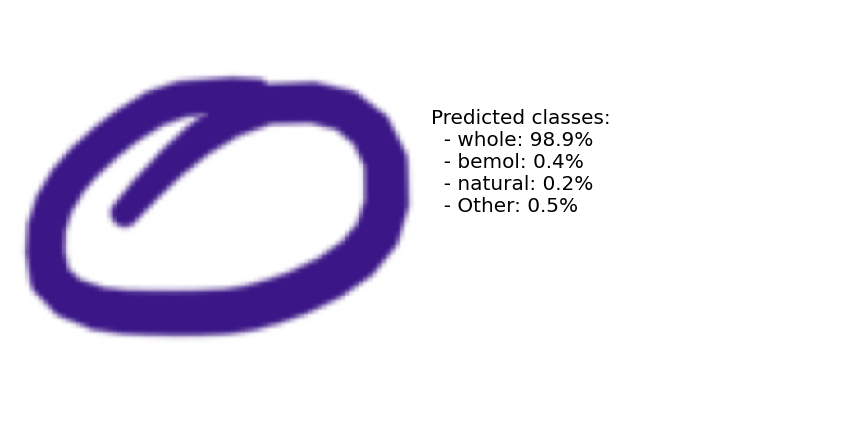

whole1637713855-1548629.jpg


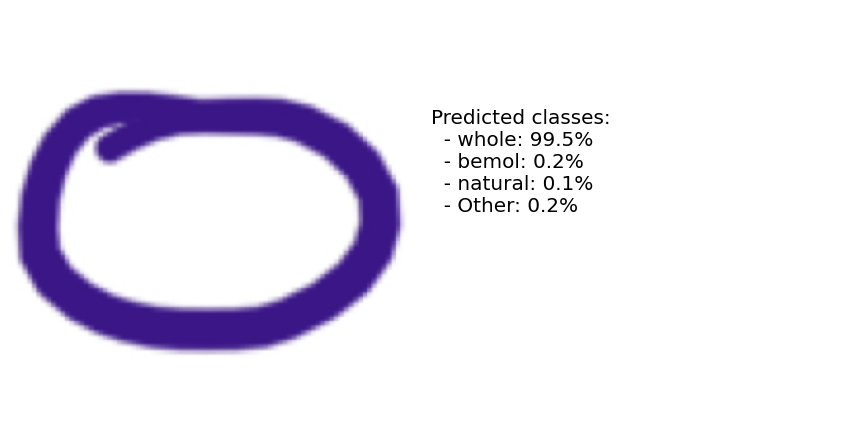

whole1637713857-159112.jpg


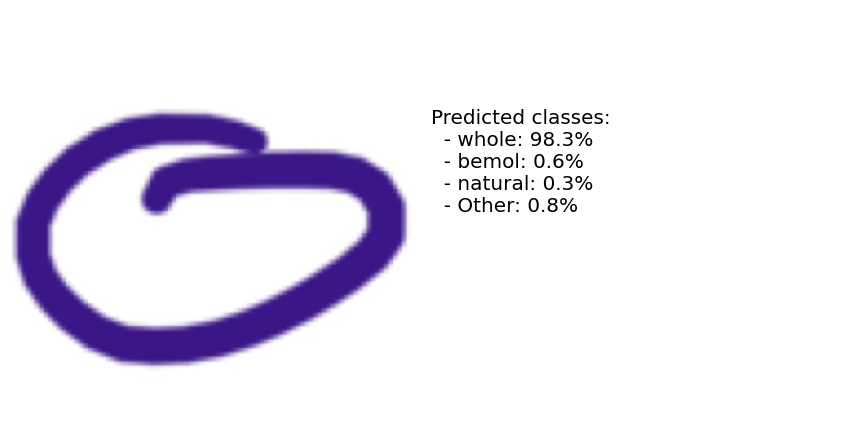

whole1637713861-106196.jpg


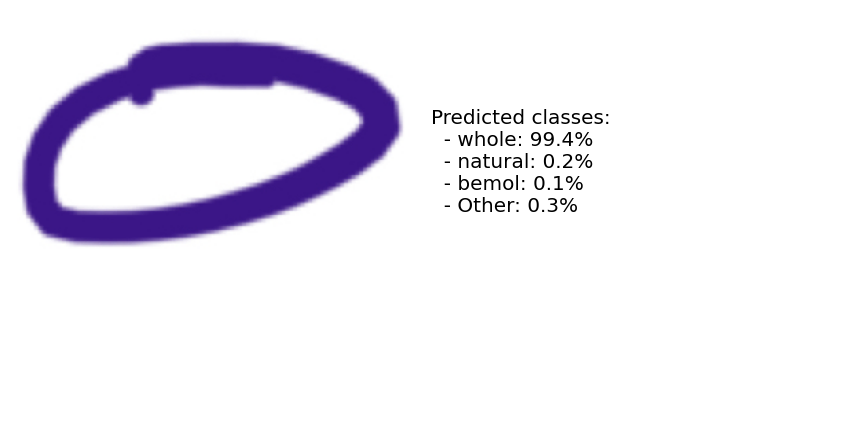

whole1637713862-542139.jpg


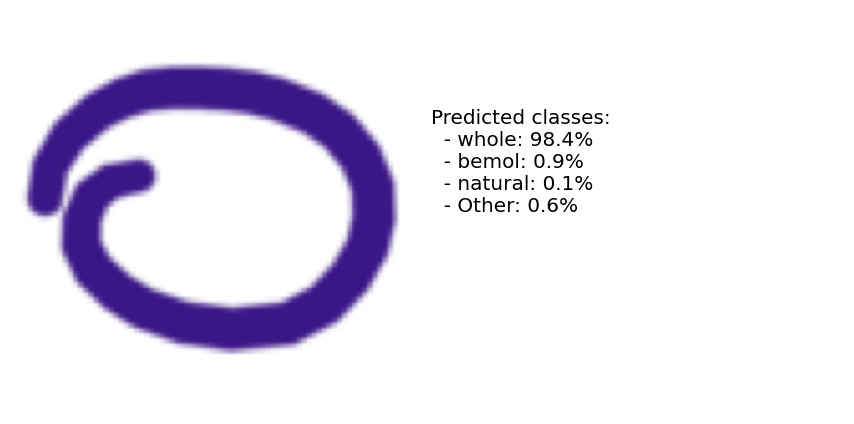

whole1637713863-8667722.jpg


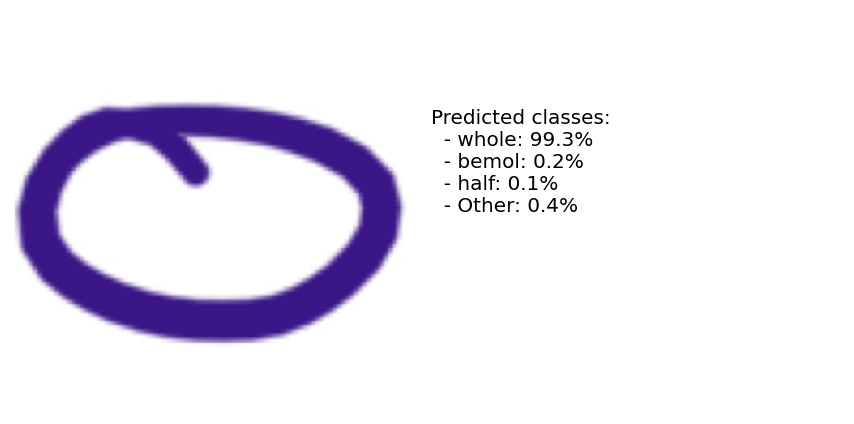

whole1637713865-427254.jpg


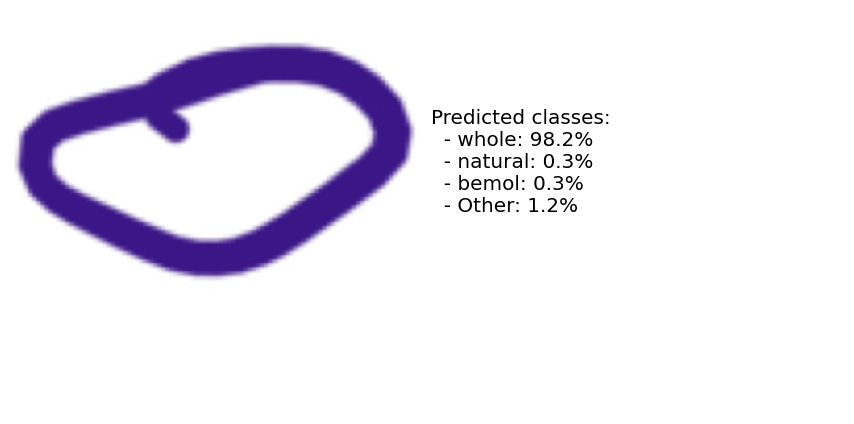

whole1637713866-903154.jpg


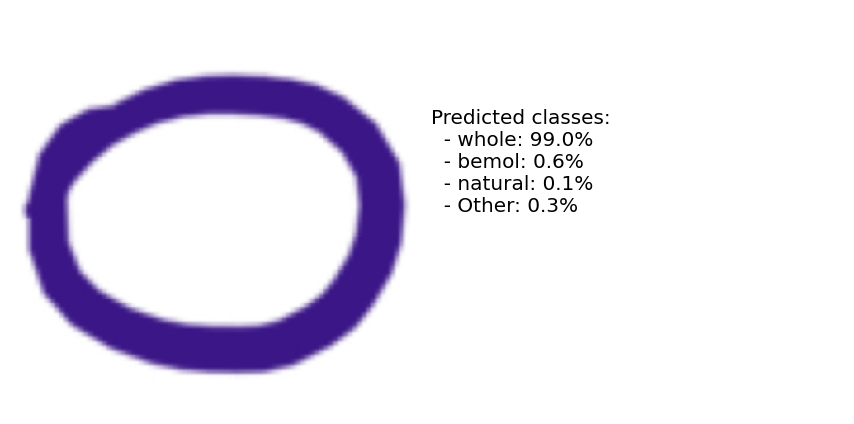

whole1637713868-9507542.jpg


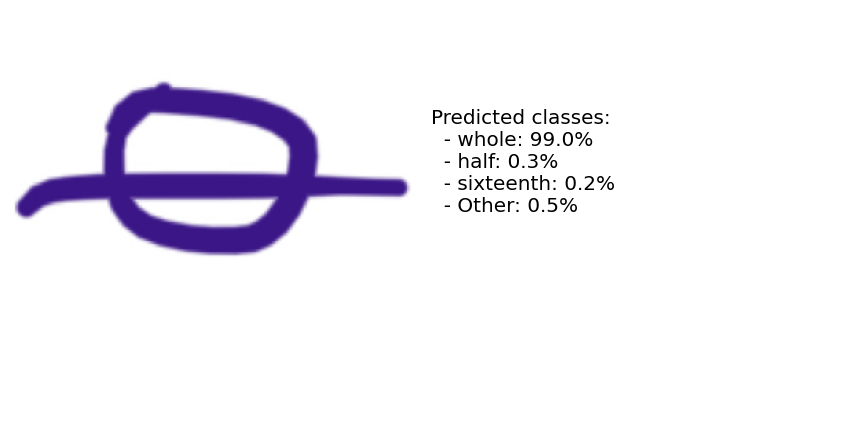

whole1637713870-842853.jpg


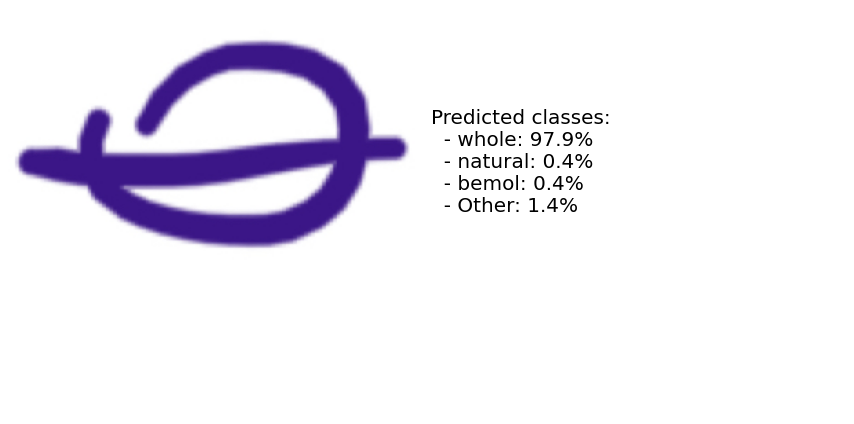

whole1637713872-8932009.jpg


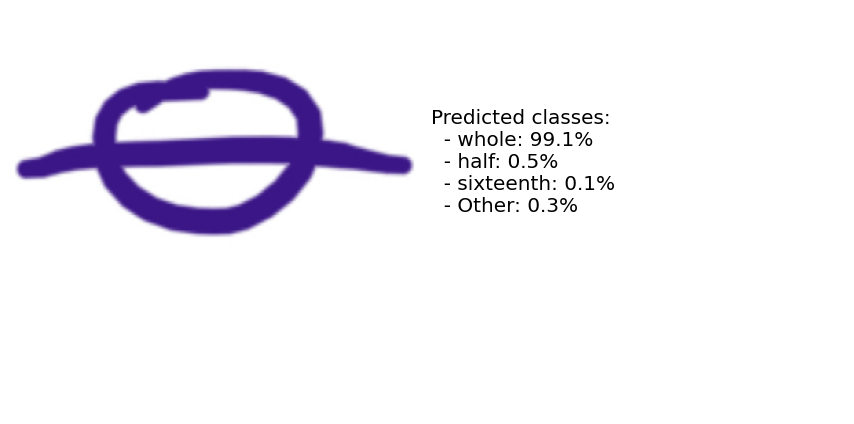

whole1637713875-042794.jpg


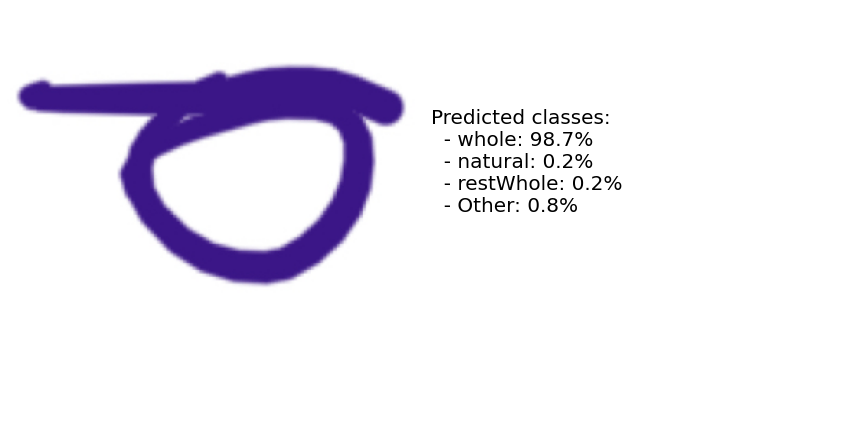

whole1637713878-365423.jpg


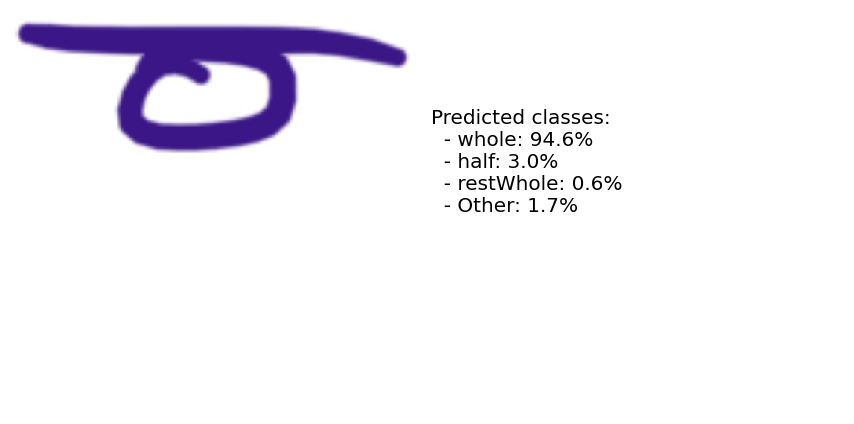

whole1637713880-160612.jpg


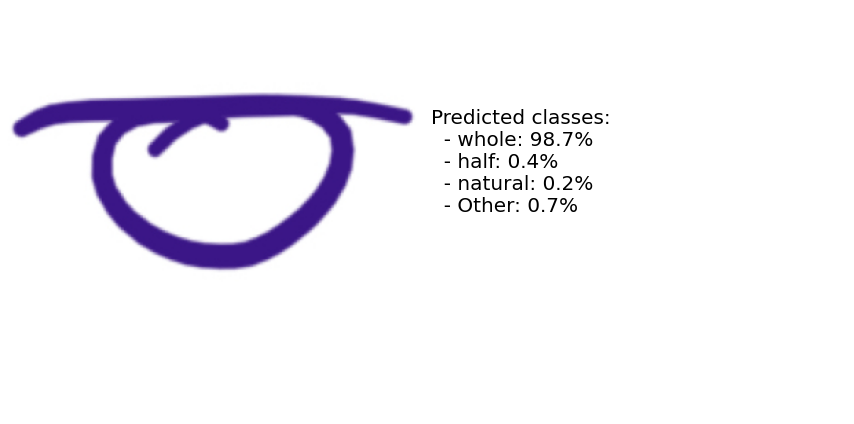

whole1637713882-220292.jpg


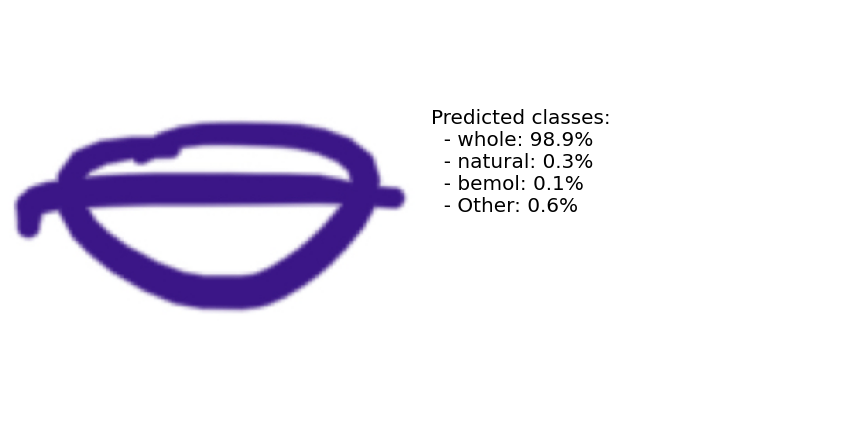

whole1637713883-496203.jpg


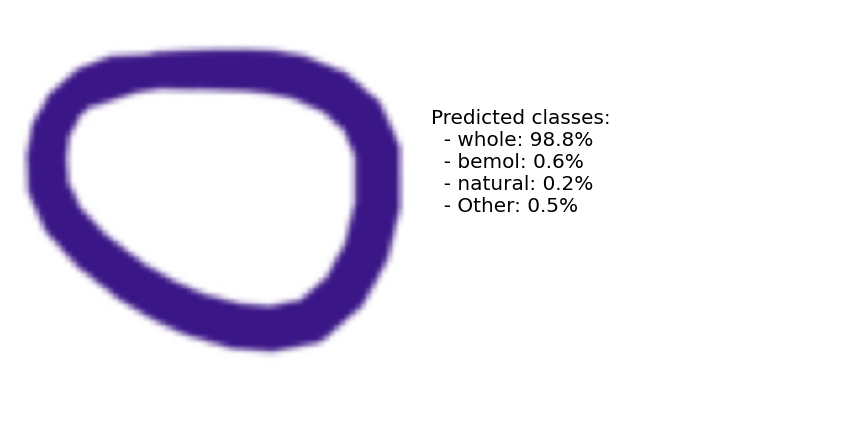

whole1637713884-95348.jpg


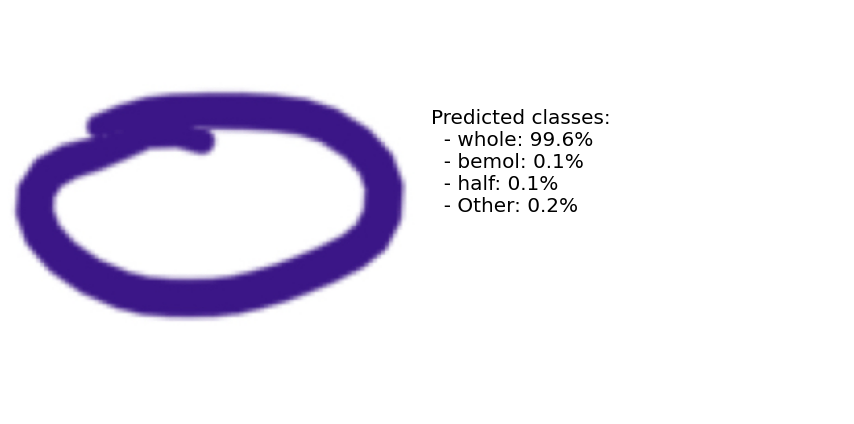

whole1637713886-391511.jpg


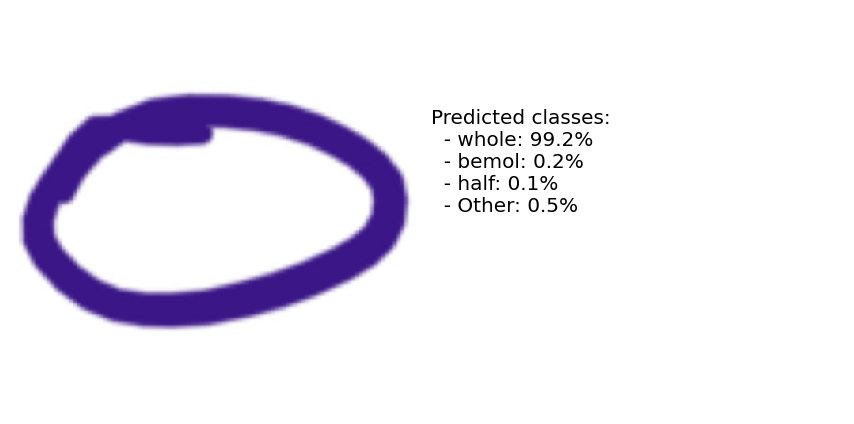

whole1637713887-800908.jpg


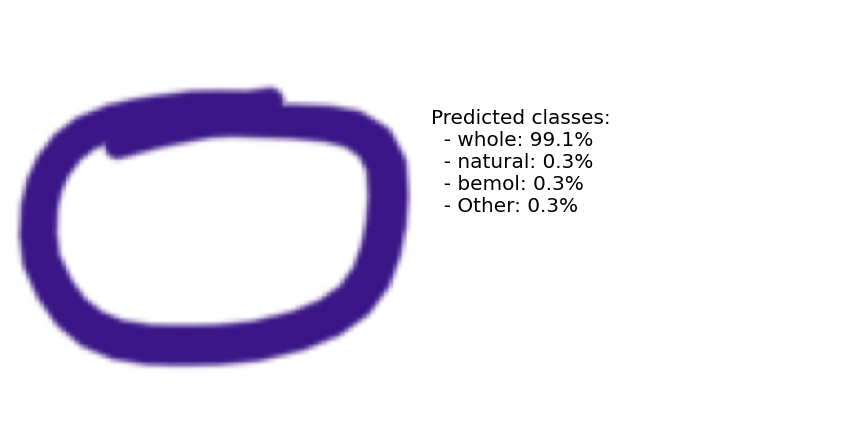

whole1637713889-263617.jpg


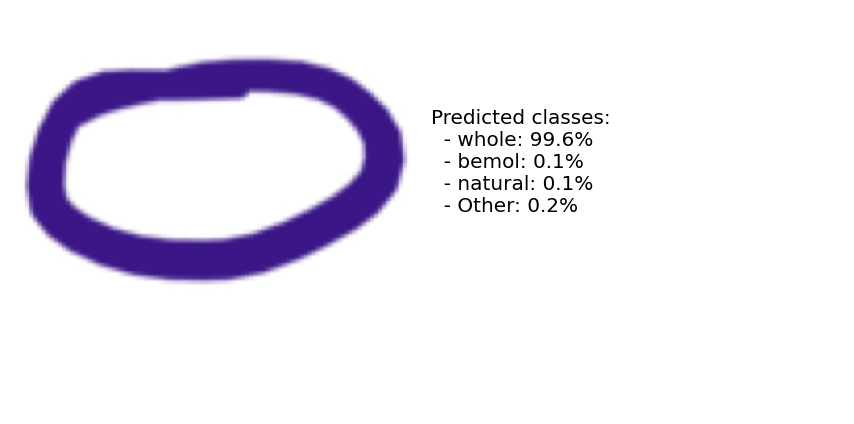

whole1637713890-76614.jpg


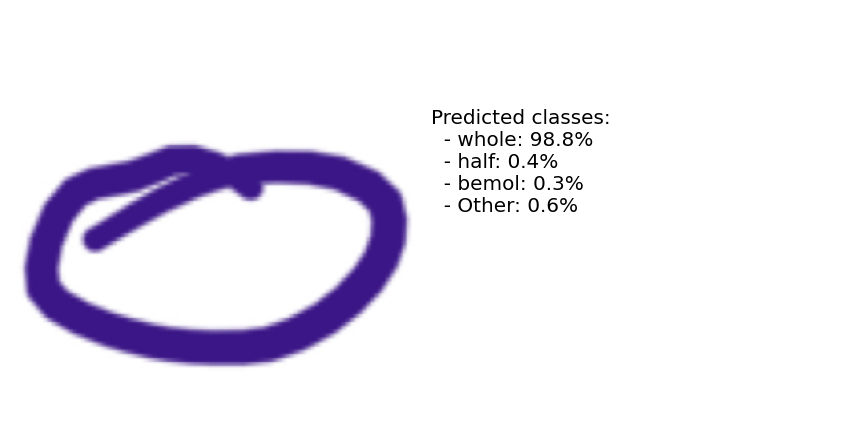

whole1637713892-504569.jpg


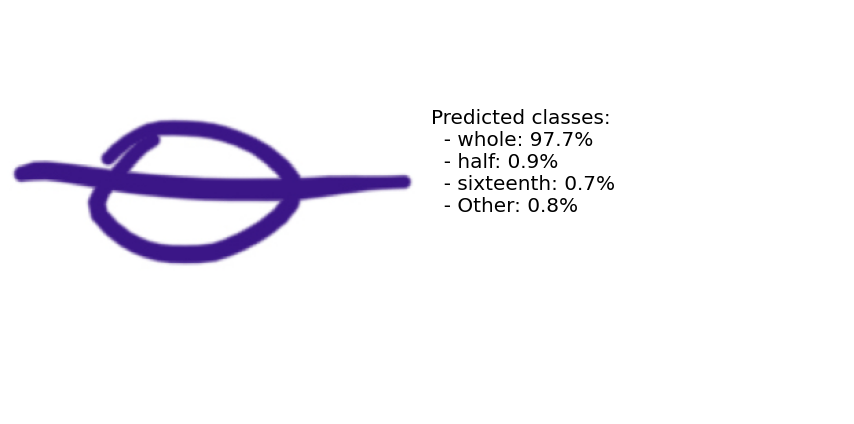

whole1637713894-237102.jpg


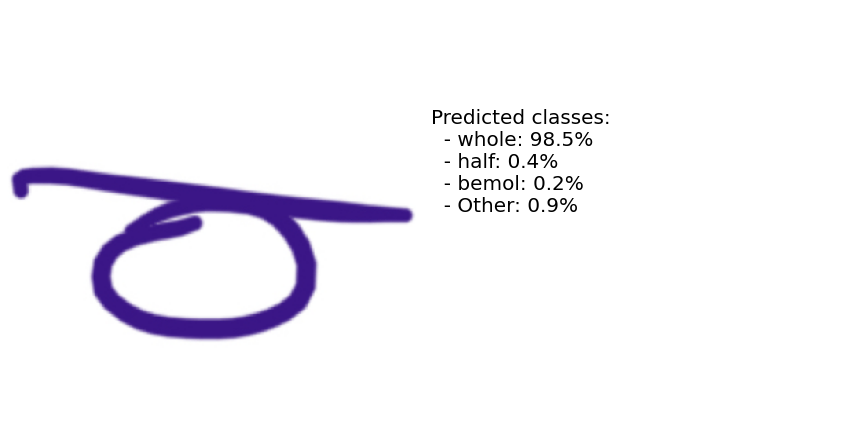

whole1637713896-426104.jpg


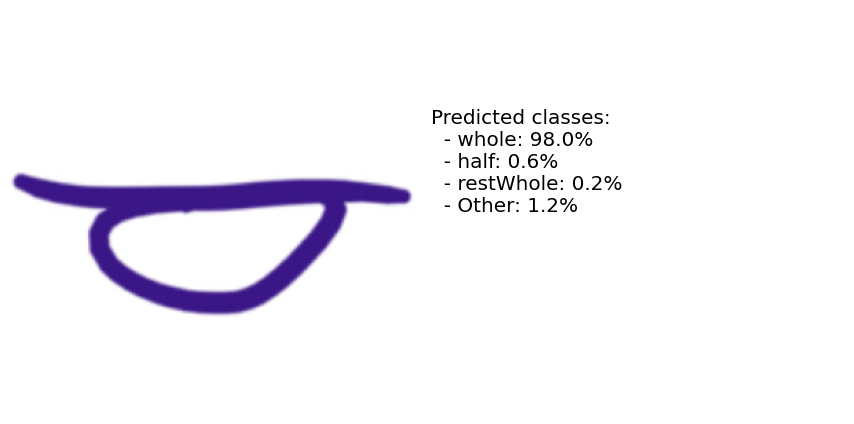

whole1637713898-064364.jpg


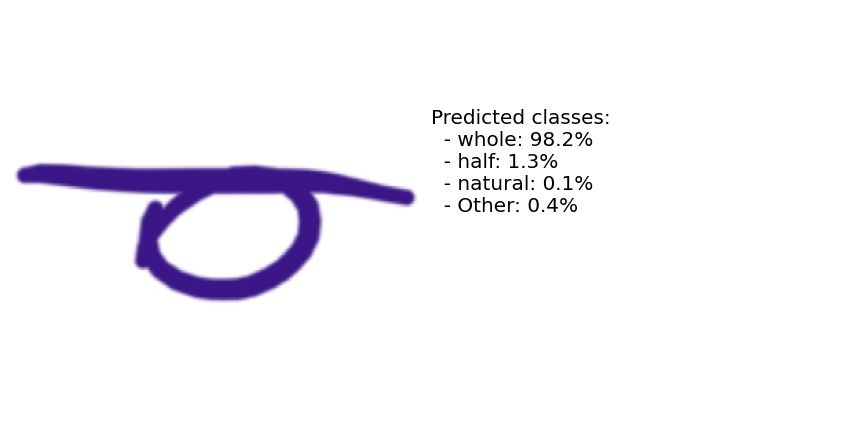

whole1637713899-872371.jpg


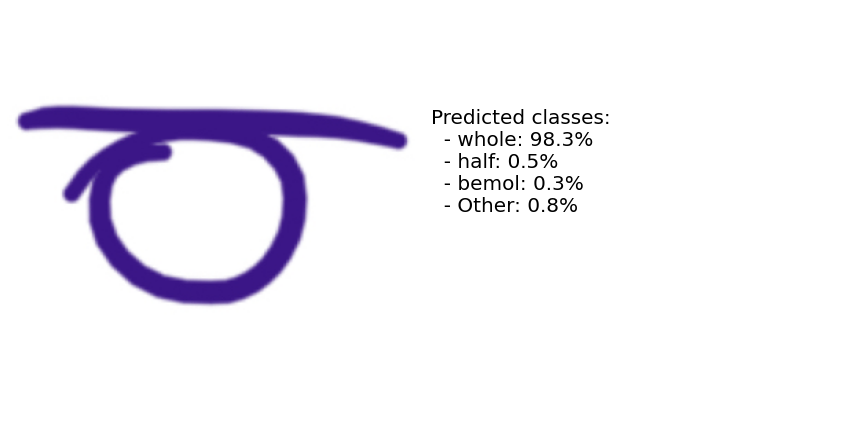

whole1637713902-963764.jpg


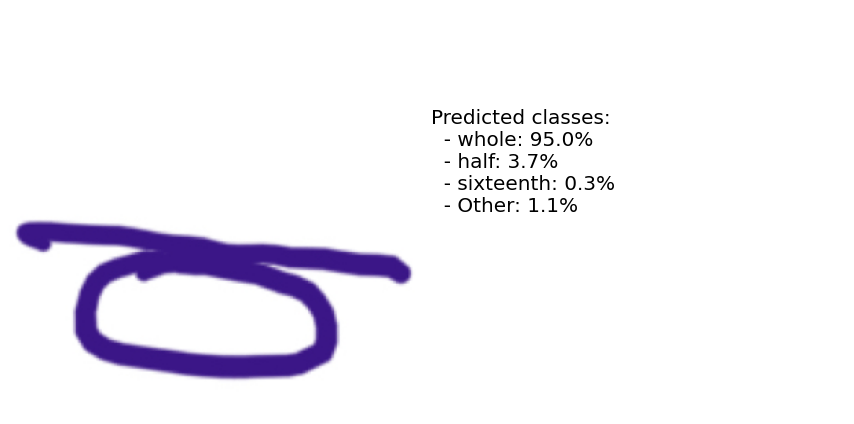

whole1637713909-3948622.jpg


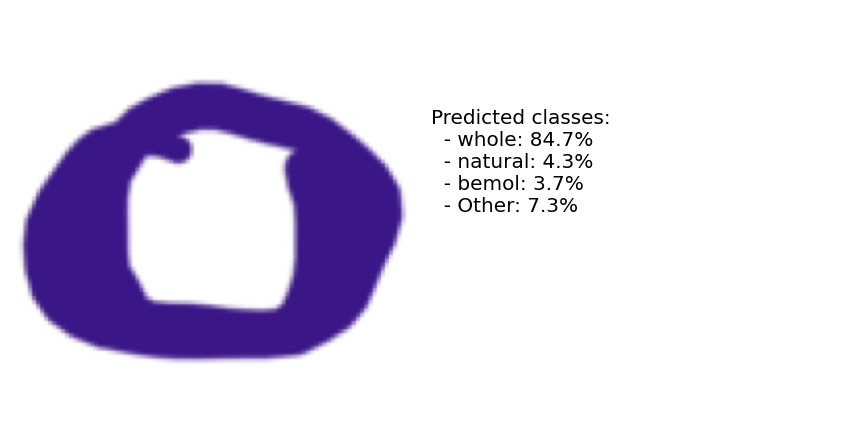

whole1637713917-492014.jpg


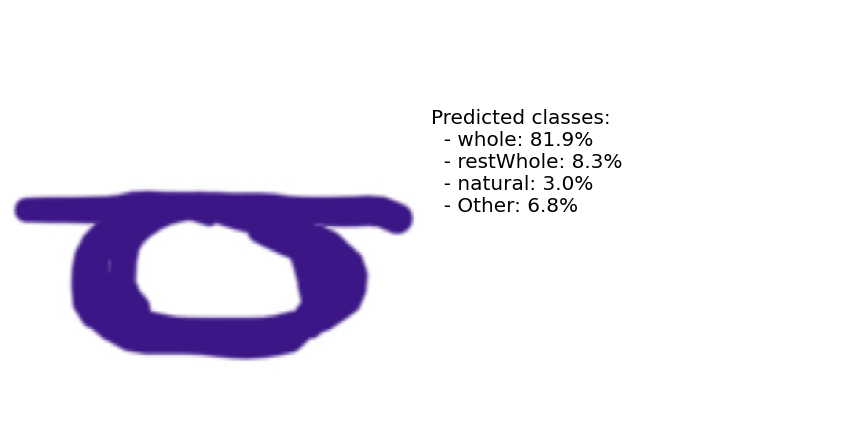

whole1637713921-29772.jpg


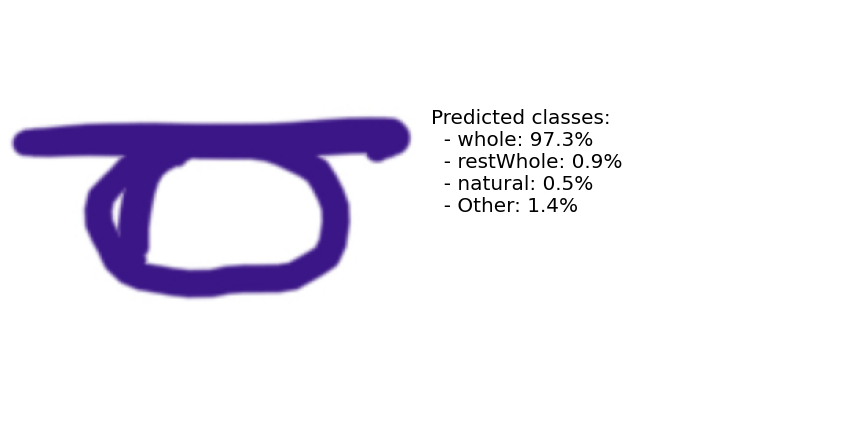

whole1637713925-944178.jpg


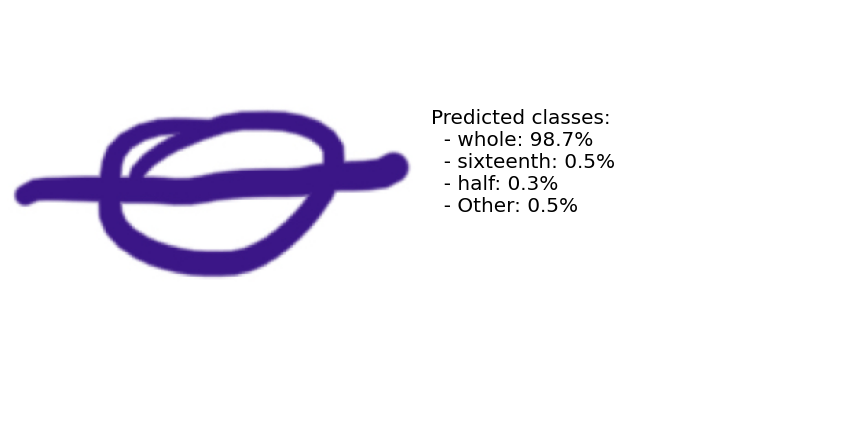

whole1637713932-024191.jpg


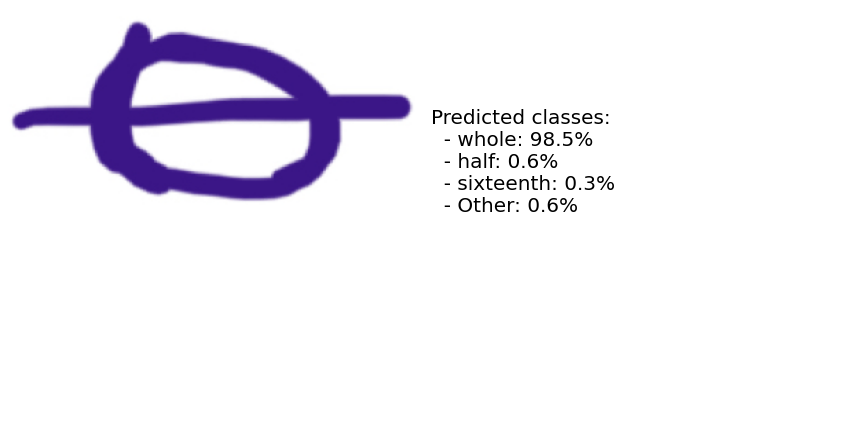

In [83]:
model.eval()
with torch.no_grad():
    for path in img_paths:
        print(path.name)
        img_pil = Image.open(path)
        preds = get_predictions(model, img_pil, device)
        display_img_and_labels(img_pil, preds, code_to_label)